In [1]:
%matplotlib notebook
import sys
if '../burnman_v1.0.1' not in sys.path:
    sys.path.insert(0,'../burnman_v1.0.1')
import burnman
import matplotlib.pyplot as plt
import numpy as np


## 1D models 

We will look at two different 1D models produced for the Earth: 
 - PREM -preliminary reference Earth model (PREM, Dziewonski & Anderson 1981): constrained by normal modes, P and S wave travel times, mass and moment of inertia
 - ak135 (Kennett et al. 1995): range of body wave travel times


The script below plots the shear wave velocities for these models. 
1. Note the disagreement of the models across the upper mantle and mantle transition zone. PREM has a discontinuity at 220 km, which is since confirmed not to be a global feature. What sort of seismic waves can constrain the discontinuities in the upper mantle? Why are these seismic phases not included in these 1D inversions? 
2. The models also don't agree on the shear wave velocity in the inner core. What do you think constrains this velocity? 
3. Plot the equivalent profiles for P wave velocity, and describe any disagreements between the models observed here.  



<IPython.core.display.Javascript object>


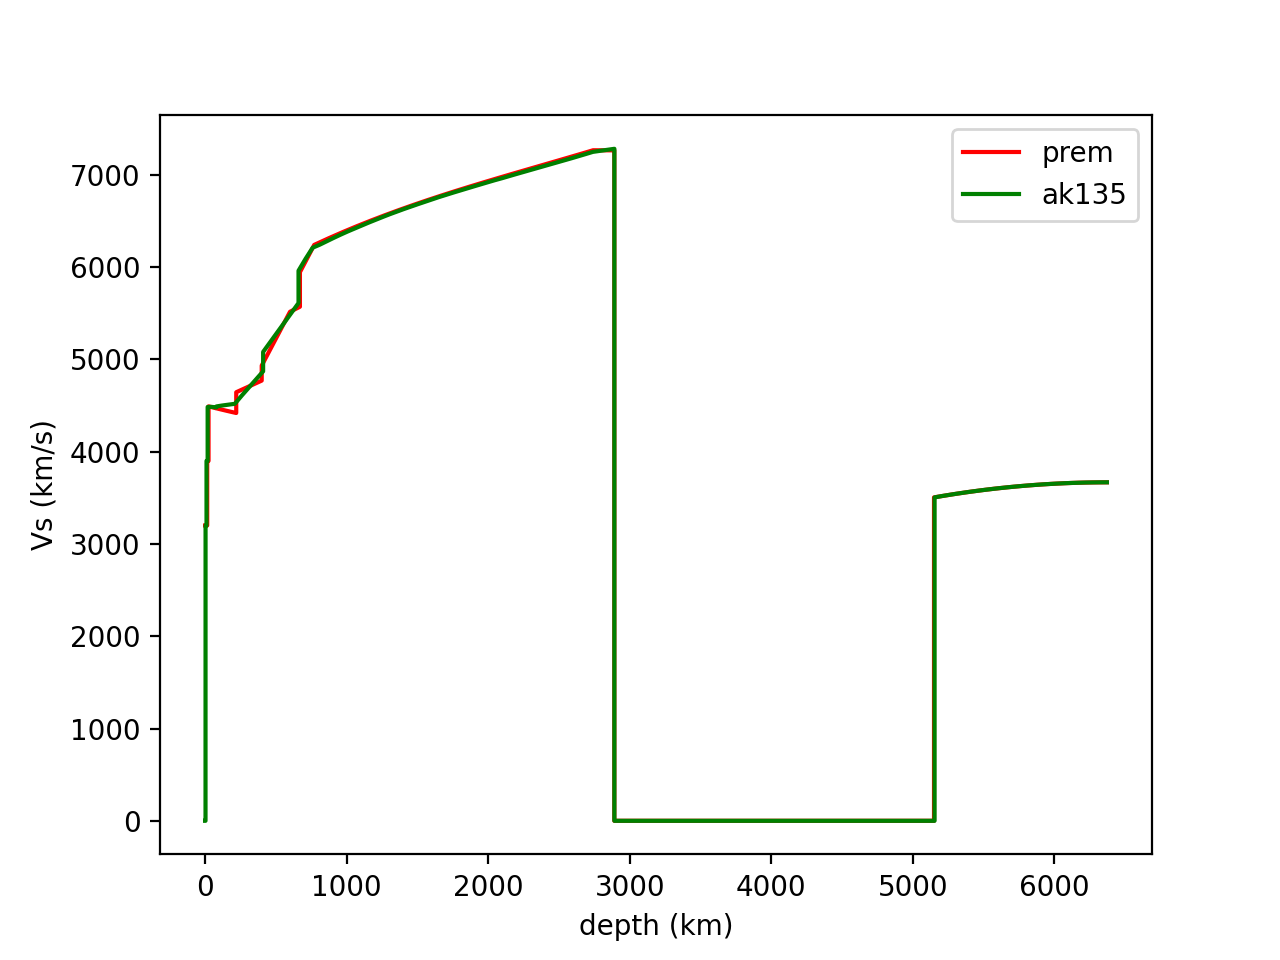

In [3]:
#import models
prem = burnman.seismic.PREM()
ak135 = burnman.seismic.AK135()

# plot models
models = [prem, ak135]
colours = ['r','g']
labels = ['prem', 'ak135']
for i,model in enumerate(models):
    depths =model.internal_depth_list(mindepth=-1.e3,maxdepth=6372.1e3)
    plt.plot(depths/1.e3,model.v_s(depths), colours[i], label=labels[i])
    plt.xlabel('depth (km)')
    plt.ylabel('Vs (km/s)')
    plt.legend()
    

### Bullen parameter
Models of the seismic structure of the Earth’s mantle give us a Bullen’s parameter. This seismically derived parameter can tell us about the level of compositional and thermal inhomogeneity with depth, and was first published by Bullen in 1963 in a paper titled 'An Index of Degree of Chemical Inhomogeneity in the Earth'. 

Bullen’s parameter $η_B$ is defined as  (eq. 1)
\begin{align}
η_B=\frac{\Phi}{ρg}  \frac{d\rho}{dz}
\end{align}
Or as (eq. 2)
$$η_B==\frac{d\kappa}{dP}-\frac{1}{g}  \frac{d\Phi}{dz}
$$ 
where $g$ is the gravitational acceleration in [$m/s^2$], $\kappa$ is the bulk modulus in [Pa], $\rho$ is density, $z$ is depth, $P$ is pressure and $\Phi$ is the seismic parameter, given by (eq. 3)
$$\Phi = V_P^2 - \frac{4}{3}V_S^2 = \frac{\kappa}{\rho}$$


The parameters $\frac{d\kappa}{dP}$, $\frac{1}{g}$ and $\frac{d\Phi}{dz}$ can all be computed from the PREM model, and thus $\eta_B$ can be determined. The result is plotted below. The Bullen parameter $\eta_B$ can then used to determine different regions in the Earth: 
	$\eta_B=1$, this is the case where material is homogeneous and adiabatic
	$\eta_B>1$, when material is more compressible than in homogeneous adiabatic conditions, which mainly happens when there are phase transitions. 
	$\eta_B<1$, when material is less compressible than in homogeneous adiabatic conditions, which can happen in thermal boundary layers.

4. Check, using the above equations, that Bullen’s parameter $η_B$ is dimensionless.  Remember $[Pa]  =10^{-5} [bar]=[ N/m^2 ]=[kg/(ms^2 )]$

5. For a homogeneous medium under hydrostatic pressure (i.e. $\eta_B$=1) $dP=rgdz$. Use this relationship and the definition for the bulk modulus $\kappa = \rho\frac{dP}{d\rho}$ to show that equation 1 is true. 

6. Use the relationship $\frac{d\kappa}{dz}=\frac{d(\rho\phi)}{dz} = \rho\frac{d\phi}{dz}+\phi\frac{d\rho}{dz}$ to show that the 2nd definition for $\eta_B$ also holds. 

7. Use the definitions for the seismic velocities to show eq. 3 for the seismic parameter is true.  


8. To compute Bullen's parameter, we will use the PREM model, which has density constrained by normal modes, mass and moment of inertia. Implement eq.1 or 2 below to compute the Bullen parameter. Note that any computation of gradients becomes unstable around the defined discontinuities. A simple (hack) solution for this is to filter out extreme values of the Bullen parameter (e.g. values below -1 and above 4).  

9.  Why does the bullen parameter become unstable near the centre of the planet? 

10.	For the upper mantle identify (roughly) where Bullen's parameter is above or below 1. Explain why these regions are not following the behavior of a homogeneous, adiabatic composition under compression.  



11.	The PREM model has been made to follow an adiabatic temperature profile in the mantle below 1000 km, and in the outer and inner core, fitting Bullen's parameter close to 1. For what regions might this assumption be incorrect?


<IPython.core.display.Javascript object>


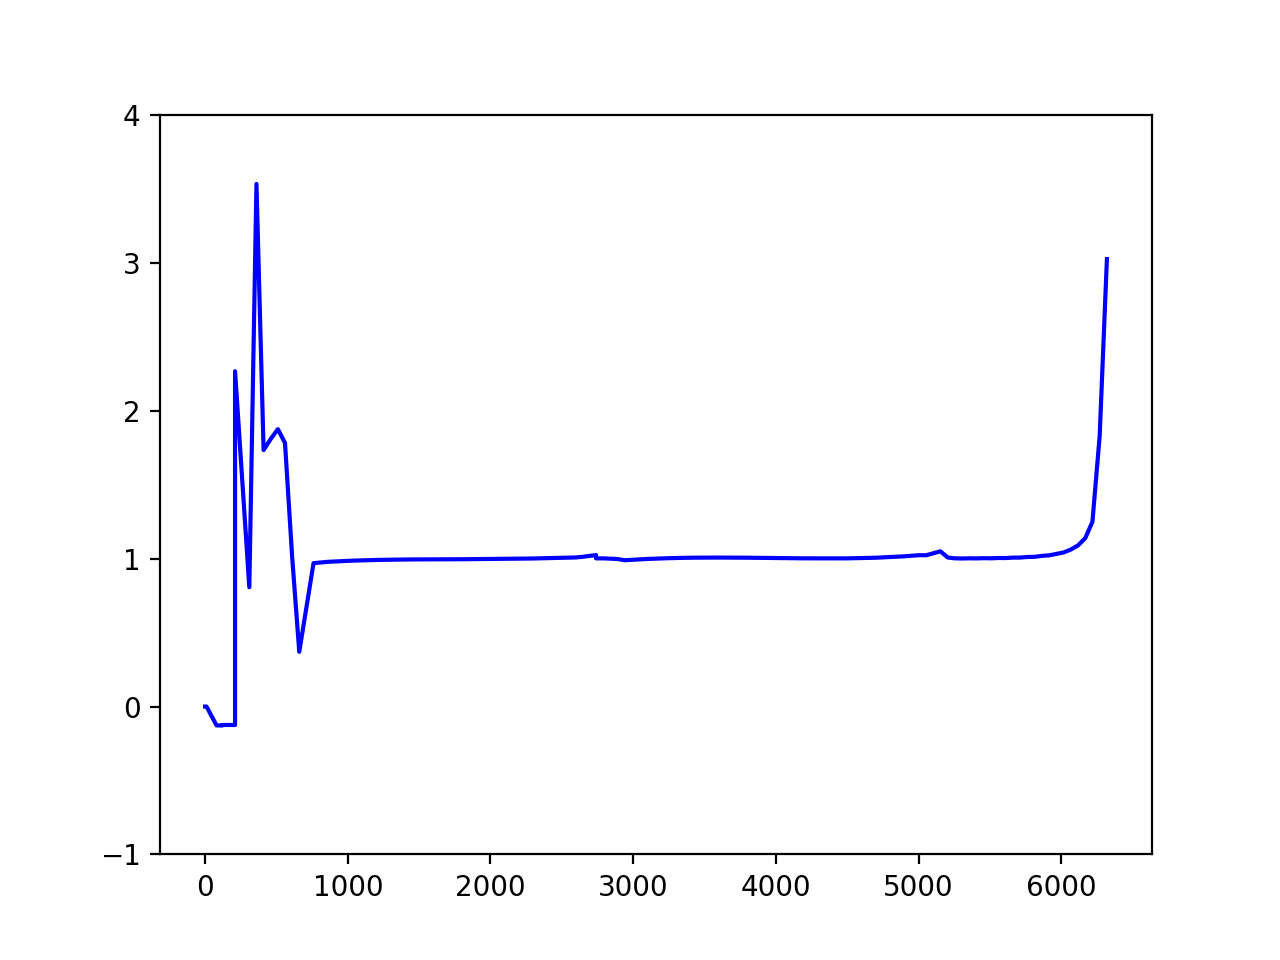

/var/folders/qy/bvknp14x5m3_6l76p344qw5h0000gn/T/ipykernel_23304/3496258554.py:17: RuntimeWarning: divide by zero encountered in true_divide
  dphidz = np.gradient(phi) / np.gradient(depths) / prem.gravity(depths)


(-1.0, 4.0)

In [49]:
plt.figure()

# load values from PREM
density = prem.density(depths)
pressure = prem.pressure(depths)
gravity= prem.gravity(depths)
vp =  prem.v_p(depths)
vs =  prem.v_s(depths)

# compute PHI and Kappa
phi = vp*vp-4./3.*vs*vs
kappa = phi * density


# compute Bullen
dkappadP = np.gradient(kappa) / np.gradient(prem.pressure(depths))
dphidz = np.gradient(phi) / np.gradient(depths) / prem.gravity(depths)
bullen = dkappadP - dphidz


# Filter out extreme Bullen values around discontinuities
dep_filt = [ depths[x]/1.e3 for x in range(len(bullen))  if bullen[x]>-1 and bullen[x]<4]
bullen_filt = [ bullen[x] for x in range(len(bullen)) if bullen[x]>-1 and bullen[x]<4]


plt.plot(dep_filt,bullen_filt,'b')
plt.ylim([-1,4])
plt.xlabel('depth (km)')
plt.ylabel('bullen')
